# CV2 Models

In [1]:
import cv2
import time
import dlib
import numpy as np
import matplotlib.pyplot as plt

## Model 0 - Haar Cascade

In [31]:
# image = cv2.imread('samples/sample_8.png')
image = cv2.imread('samples/sample_9.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [32]:
face_cascade = cv2.CascadeClassifier('model/haarcascade_frontalface_default.xml')

In [33]:
faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

In [34]:
faces

array([[510, 150,  46,  46],
       [277, 107,  48,  48],
       [175, 146,  54,  54]], dtype=int32)

In [35]:
for face in faces:
    cv2.rectangle(image, (face[0], face[1]), (face[0] + face[2], face[1] + face[3]), (0, 255, 0), 2)

In [36]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(-0.5, 639.5, 425.5, -0.5)

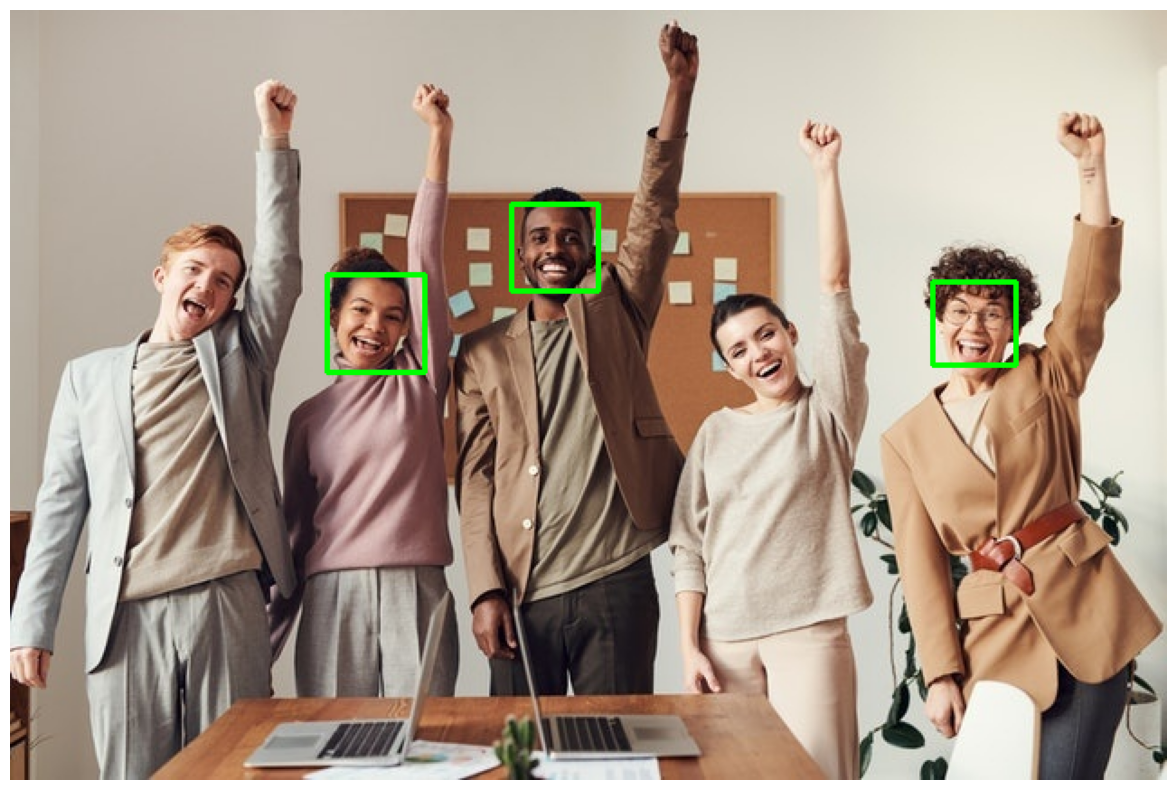

In [37]:
plt.figure(figsize=(20,10))
plt.imshow(image_rgb)
plt.axis('off')

## Model 1 - get_frontal_face_detector

In [166]:
image = cv2.imread('samples/sample_4.png')
# image = cv2.imread('samples/sample_8.png')
# image = cv2.imread('samples/sample_9.jpg')

In [167]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [168]:
detector = dlib.get_frontal_face_detector()
detected_boxes = detector(image_rgb, 1)

In [169]:
detected_boxes

rectangles[[(636, 614) (688, 666)], [(245, 314) (296, 366)], [(435, 620) (487, 671)], [(49, 602) (101, 654)], [(170, 464) (222, 516)], [(440, 291) (492, 343)], [(529, 433) (591, 495)], [(612, 294) (674, 357)], [(349, 440) (411, 502)], [(-9, 464) (49, 516)], [(239, 605) (301, 668)], [(31, 326) (83, 378)]]

In [175]:
faces = [[face.left(), face.top(), face.width(), face.height()] for face in detected_boxes]

In [143]:
for face in detected_boxes:
    x, y, w, h = face.left(), face.top(), face.width(), face.height()
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)

(-0.5, 701.5, 1263.5, -0.5)

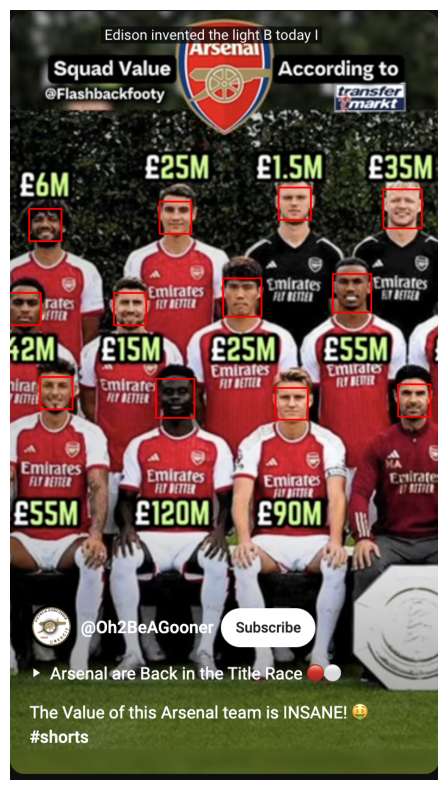

In [144]:
plt.figure(figsize=(20,10))
plt.imshow(image_rgb)
plt.axis('off')

## Model 2 - cnn_face_detection_model_v1

In [25]:
# image = cv2.imread('samples/sample_4.png')
image = cv2.imread('samples/sample_7.png') 
# image = cv2.imread('samples/sample_8.png')
# image = cv2.imread('samples/sample_9.jpg')
# image = cv2.imread('samples/sample_10.png')

In [26]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [27]:
detector = dlib.cnn_face_detection_model_v1('model/mmod_human_face_detector.dat')
detected_boxes = detector(image_rgb, 1)

In [28]:
detected_boxes

mmod_rectangles[[(216, 205) (314, 303)]]

In [29]:
for face in detected_boxes:
    x, y, w, h = face.rect.left(), face.rect.top(), face.rect.width(), face.rect.height()
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)

(-0.5, 631.5, 1145.5, -0.5)

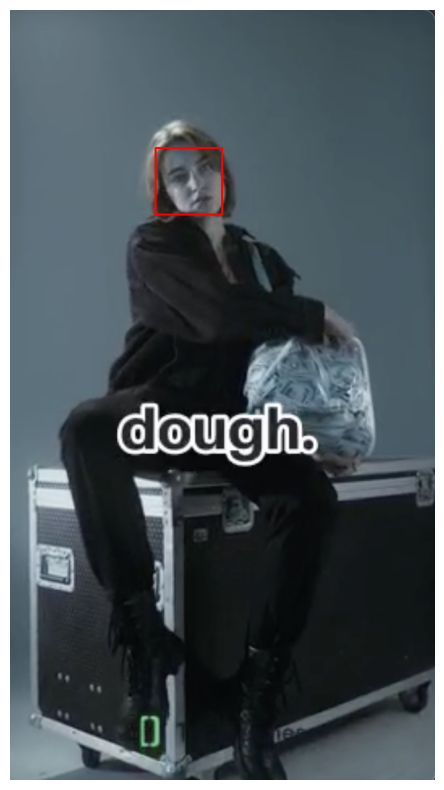

In [30]:
plt.figure(figsize=(20,10))
plt.imshow(image_rgb)
plt.axis('off')

## Model 3 - DNN Model

In [94]:
# image = cv2.imread('samples/sample_4.png')
# image = cv2.imread('samples/sample_7.png') 
# image = cv2.imread('samples/sample_8.png')
image = cv2.imread('samples/sample_9.jpg')
# image = cv2.imread('samples/sample_10.png')

In [95]:
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,(300, 300), (104.0, 177.0, 123.0))

In [96]:
net = cv2.dnn.readNetFromCaffe('model/deploy.prototxt', 'model/res10_300x300_ssd_iter_140000.caffemodel')

In [97]:
net.setInput(blob)

In [98]:
detections = net.forward()

In [99]:
detections

array([[[[0.        , 1.        , 0.9891116 , ..., 0.34059817,
          0.3451985 , 0.4716006 ],
         [0.        , 1.        , 0.9735728 , ..., 0.25045946,
          0.4978983 , 0.37383005],
         [0.        , 1.        , 0.9663982 , ..., 0.3535568 ,
          0.8697113 , 0.47205013],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

In [100]:
# Process detections
(h, w) = image.shape[:2]
boundaries = []

In [101]:
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.15:  # Consider detection as valid with a confidence greater than 0.5
        # Compute the (x, y)-coordinates of the bounding box
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        width = endX - startX
        height = endY - startY
        boundaries.append((startX, startY, width, height))

In [105]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [106]:
for (x, y, width, height) in boundaries:
    cv2.rectangle(image_rgb, (x, y), (x + width, y + height), (0, 255, 0), 2)

(-0.5, 639.5, 425.5, -0.5)

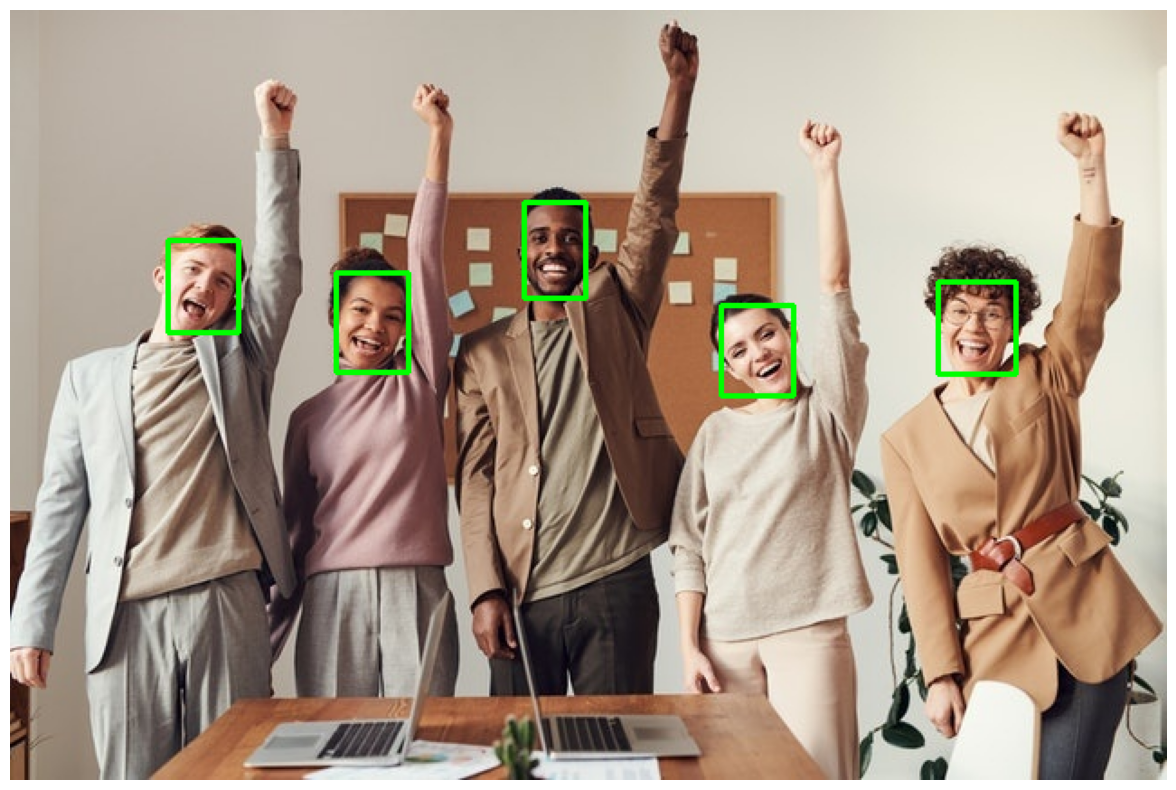

In [107]:
plt.figure(figsize=(20,10))
plt.imshow(image_rgb)
plt.axis('off')

In [ ]:
class FaceOrientationCounter:
    def __init__(self):
        # Initialize counters for each orientation
        self.counters = {0: 0, 90: 0, 270: 0}
        
    def update(self, angle, faces_detected):
        # Increase the counter for the current angle if faces are detected
        if faces_detected > 0:
            self.counters[angle] = (faces_detected + self.counters[angle])/2
            
        # Decrease the counters slightly each time to favor recent observations
        for ang in self.counters:
            if ang != angle:
                self.counters[ang] *= 0.9  # Decay factor for 'forgetting' older observations
                
    def get_preferred_orientation(self):
        # Determine the orientation with the highest counter value
        preferred_angle = max(self.counters, key=self.counters.get)
        return preferred_angle